In [1]:
import os
import pandas as pd
import zipfile

In [2]:
# Seteo la ruta del repositorio (reemplazarla por la propia)
ruta = r"C:\Users\Sofia\OneDrive\Escritorio\ML\PS2"

In [3]:
# Fijo rutas para cada carpeta del repositorio
document_path = os.path.join(ruta, "document")
scripts_path = os.path.join(ruta, "scripts")
stores_path = os.path.join(ruta, "stores")
views_path = os.path.join(ruta, "views")

zip_path = os.path.join(stores_path, "mlunlp-2024-ps-2.zip")


In [4]:
train_hogares_path = "train_hogares.csv"
train_personas_path = "train_personas.csv"
test_hogares_path = "test_hogares.csv"
test_personas_path = "test_personas.csv"

In [5]:
with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open(train_hogares_path) as f:
        train_hogares = pd.read_csv(f)

with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open(train_personas_path) as f:
        train_personas = pd.read_csv(f)

with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open(test_hogares_path) as f:
        test_hogares = pd.read_csv(f)

with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open(test_personas_path) as f:
        test_personas = pd.read_csv(f)

In [6]:
train_merged = pd.merge(train_personas, train_hogares, on='id', how= "inner", suffixes=('_ind', '_hogar'))  
test_merged = pd.merge(test_personas, test_hogares, on='id', how= "inner", suffixes=('_ind', '_hogar'))  

**Creación y transformación de variables**

In [7]:
columnas = train_merged.columns.tolist()
print(columnas)

columnas2 = test_merged.columns.tolist()
print(columnas2)

['id', 'Orden', 'Clase_ind', 'Dominio_ind', 'Estrato1', 'P6020', 'P6040', 'P6050', 'P6090', 'P6100', 'P6210', 'P6210s1', 'P6240', 'Oficio', 'P6426', 'P6430', 'P6500', 'P6510', 'P6510s1', 'P6510s2', 'P6545', 'P6545s1', 'P6545s2', 'P6580', 'P6580s1', 'P6580s2', 'P6585s1', 'P6585s1a1', 'P6585s1a2', 'P6585s2', 'P6585s2a1', 'P6585s2a2', 'P6585s3', 'P6585s3a1', 'P6585s3a2', 'P6585s4', 'P6585s4a1', 'P6585s4a2', 'P6590', 'P6590s1', 'P6600', 'P6600s1', 'P6610', 'P6610s1', 'P6620', 'P6620s1', 'P6630s1', 'P6630s1a1', 'P6630s2', 'P6630s2a1', 'P6630s3', 'P6630s3a1', 'P6630s4', 'P6630s4a1', 'P6630s6', 'P6630s6a1', 'P6750', 'P6760', 'P550', 'P6800', 'P6870', 'P6920', 'P7040', 'P7045', 'P7050', 'P7070', 'P7090', 'P7110', 'P7120', 'P7140s1', 'P7140s2', 'P7150', 'P7160', 'P7310', 'P7350', 'P7422', 'P7422s1', 'P7472', 'P7472s1', 'P7495', 'P7500s1', 'P7500s1a1', 'P7500s2', 'P7500s2a1', 'P7500s3', 'P7500s3a1', 'P7505', 'P7510s1', 'P7510s1a1', 'P7510s2', 'P7510s2a1', 'P7510s3', 'P7510s3a1', 'P7510s5', 'P751

In [8]:
# Creo la variable hacin
train_merged["hacin"] = train_merged["Nper"] / train_merged["P5010"]
test_merged["hacin"] = test_merged["Nper"] / test_merged["P5010"]

In [9]:
# Calculo la cantidad de personas por cuarto (contando la sala y el comedor pero excluyendo los baños, garajes y los cuartos utilizados para negocio)
train_merged["nper_por_cuarto"] = (train_merged["Nper"] / train_merged["P5000"]).astype(float)
test_merged["nper_por_cuarto"] = (train_merged["Nper"] / train_merged["P5000"]).astype(float)

# Considero como hogares con hacinamiento crítico a aquellos con más de 3 personas por cuarto
train_merged["hacin"] = (train_merged["nper_por_cuarto"] > 3).astype(int)
test_merged["hacin"] = (train_merged["nper_por_cuarto"] > 3).astype(int)


In [10]:
# Transformo los valores de P6210
train_merged["P6210"] = train_merged["P6210"].fillna(0).astype(int) 
print(train_merged["P6210"].unique())

test_merged["P6210"] = train_merged["P6210"].fillna(0).astype(int) 

[3 2 5 4 1 6 0 9]


In [11]:
# Obtengo el máximo nivel educativo por hogar
educacion_max_hogar = train_merged.groupby("id")["P6210"].max().reset_index()
educacion_max_hogar2 = test_merged.groupby("id")["P6210"].max().reset_index()

# Renombro la columna
educacion_max_hogar.rename(columns={"P6210": "educ_max"}, inplace=True)
educacion_max_hogar2.rename(columns={"P6210": "educ_max"}, inplace=True)

train_merged = train_merged.merge(educacion_max_hogar, on="id", how="left")
test_merged = test_merged.merge(educacion_max_hogar2, on="id", how="left")

In [12]:
# Transformo los valores de P6100
train_merged["P6100"] = train_merged["P6100"].fillna(0).astype(int) 
test_merged["P6100"] = test_merged["P6100"].fillna(0).astype(int) 

# Creo dummy con personas de régimen de salud subsidiado
test_merged["salud_subsi"] = (test_merged["P6100"] == 3).astype(int)
train_merged["salud_subsi"] = (train_merged["P6100"] == 3).astype(int)

In [13]:
# Transformo los valores de P6585s3
train_merged["P6585s3"] = train_merged["P6585s3"].fillna(0).astype(int) 
test_merged["P6585s3"] = test_merged["P6585s3"].fillna(0).astype(int) 

# Asigno valor 1 a quienes reportan que sí y 0 en otro caso
train_merged["fam_subsi"] = (train_merged["P6585s3"] == 1).astype(int)

test_merged["fam_subsi"] = (test_merged["P6585s3"] == 1).astype(int)

In [14]:
# Transformo los valores de P6585s1
train_merged["P6585s1"] = train_merged["P6585s1"].fillna(0).astype(int) 
test_merged["P6585s1"] = test_merged["P6585s1"].fillna(0).astype(int) 

# Asigno valor 1 a quienes reportan que sí y 0 en otro caso
train_merged["alim_subsi"] = (train_merged["P6585s1"] == 1).astype(int)
test_merged["alim_subsi"] = (test_merged["P6585s1"] == 1).astype(int)

In [15]:
# Transformo los valores de P6585s2
train_merged["P6585s2"] = train_merged["P6585s2"].fillna(0).astype(int) 
test_merged["P6585s2"] = test_merged["P6585s2"].fillna(0).astype(int) 

# Asigno valor 1 a quienes reportan que sí y 0 en otro caso
train_merged["transp_subsi"] = (train_merged["P6585s2"] == 1).astype(int)
test_merged["transp_subsi"] = (test_merged["P6585s2"] == 1).astype(int)

In [16]:
# Selecciono las variables que podría llegar a utilizar para estimar pobreza con el primer approach
train_pobreza = train_merged[["P6040", "hacin", "educ_max", "salud_subsi", "P6430", "Lp", "Pobre"]]
test_pobreza = test_merged[["P6040", "hacin", "educ_max", "salud_subsi", "P6430", "Lp"]]

In [17]:
# Selecciono las variables que podría llegar a utilizar para estimar pobreza con el segundo approach

train_ingreso = train_merged[["hacin", "P6040", "P6800", "P6210", "educ_max","Ingtot", "P6426", "P6430", "P7050", "Lp"]]
test_ingreso = test_merged[[ "P6020", "hacin", "P6040", "P6800", "P6210", "educ_max", "P6426", "P6430", "P7050", "Lp"]]


# "P6040": edad, 
# "P6020": sexo, 
# "P6920": cotiza pension, 
# "P6800": horas de trabajo semanal normal, 
# "P6210": máximo nivel educativo, 
# "P6426": antigüedad, 
# "P6920": tipo de ocupación

**Estadística descriptiva**

In [18]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Función para imputar valores NaN usando regresión
def impute_with_regression(df):
    for col in df.columns:
        if df[col].isnull().any():
            # Separar datos completos e incompletos
            train_complete = df[df[col].notnull()]
            train_missing = df[df[col].isnull()]
            
            # Seleccionar predictores no nulos
            predictors = train_complete.drop(columns=[col]).dropna(axis=1)
            if predictors.empty:  # Si no hay predictores disponibles
                continue
            
            # Imputar valores faltantes en los predictores de train_missing
            missing_predictors = train_missing[predictors.columns]
            missing_predictors.fillna(predictors.mean(), inplace=True)  # Imputar media en los predictores
            
            # Entrenar el modelo predictivo
            model = LinearRegression()
            model.fit(predictors, train_complete[col])
            
            # Predecir los valores faltantes
            df.loc[df[col].isnull(), col] = model.predict(missing_predictors)
    return df

# Convertir las bases a DataFrames si no lo son
train_pobreza = pd.DataFrame(train_pobreza)
test_pobreza = pd.DataFrame(test_pobreza)
train_ingreso = pd.DataFrame(train_ingreso)
test_ingreso = pd.DataFrame(test_ingreso)

# Aplicar la imputación a cada base
train_pobreza = impute_with_regression(train_pobreza)
test_pobreza = impute_with_regression(test_pobreza)
train_ingreso = impute_with_regression(train_ingreso)
test_ingreso = impute_with_regression(test_ingreso)

# Mostrar resultados (opcional)
print("Imputación completada.")


C:\Users\Sofia\AppData\Local\Temp\ipykernel_21532\59501054.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_predictors.fillna(predictors.mean(), inplace=True)  # Imputar media en los predictores
C:\Users\Sofia\AppData\Local\Temp\ipykernel_21532\59501054.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_predictors.fillna(predictors.mean(), inplace=True)  # Imputar media en los predictores
C:\Users\Sofia\AppData\Local\Temp\ipykernel_21532\59501054.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.p

Imputación completada.


C:\Users\Sofia\AppData\Local\Temp\ipykernel_21532\59501054.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_predictors.fillna(predictors.mean(), inplace=True)  # Imputar media en los predictores


In [19]:
# Seleccionar la variable "id" de train_merged
id_column = train_merged[["id"]]
id_column2 = test_merged[["id"]]

# Combinar las bases
train_ingreso = pd.concat([train_ingreso, id_column], axis=1)
test_ingreso = pd.concat([test_ingreso, id_column2], axis=1)
train_pobreza = pd.concat([train_pobreza, id_column], axis=1)
test_pobreza = pd.concat([test_pobreza, id_column2], axis=1)

train_ingreso = train_ingreso.loc[:, ~train_ingreso.columns.duplicated()]
test_ingreso = test_ingreso.loc[:, ~test_ingreso.columns.duplicated()]
train_pobreza = train_pobreza.loc[:, ~train_pobreza.columns.duplicated()]
test_pobreza = test_pobreza.loc[:, ~test_pobreza.columns.duplicated()]

In [20]:
# Selecciono las variables numéricas a ser utilizadas en alguno de los dos modelos
train_pobreza.describe()

,P6040,hacin,educ_max,salud_subsi,P6430,Lp,Pobre
count,543109.000000,543109.000000,543109.000000,543109.000000,543109.000000,543109.000000,543109.000000
mean,33.552710,0.025192,5.258397,0.365034,2.771904,271419.530628,0.251369
std,21.652844,0.156708,0.951516,0.481440,1.316057,33880.457800,0.433801
min,0.000000,0.000000,1.000000,0.000000,1.000000,167222.477630,0.000000
25%,16.000000,0.000000,5.000000,0.000000,1.703829,275482.357470,0.000000
50%,31.000000,0.000000,6.000000,0.000000,2.819578,280072.175536,0.000000
75%,50.000000,0.000000,6.000000,1.000000,4.000000,285766.659597,1.000000
max,110.000000,1.000000,9.000000,1.000000,9.000000,303816.690226,1.000000


In [21]:
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")

C:\Users\Sofia\AppData\Local\Temp\ipykernel_21532\2784202497.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")


[Text(0, 0, 'Ninguno'),
 Text(1, 0, 'Preescolar'),
 Text(2, 0, 'Primaria'),
 Text(3, 0, 'Secundaria'),
 Text(4, 0, 'Media'),
 Text(5, 0, 'Superior o univ.'),
 Text(6, 0, 'NS/NI')]

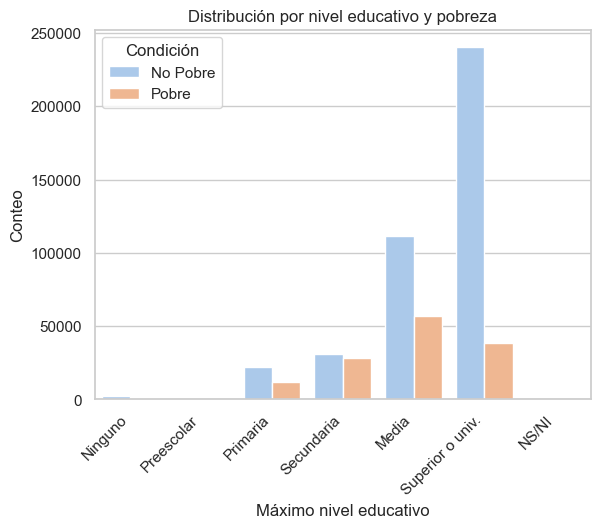

In [22]:
# Especificar el orden de las categorías
educ_labels = {
    1: "Ninguno",
    2: "Preescolar",
    3: "Primaria",
    4: "Secundaria",
    5: "Media",
    6: "Superior o univ.",
    9: "NS/NI"
}

# Crear la columna con etiquetas descriptivas
train_pobreza["educ_max_label"] = train_pobreza["educ_max"].map(educ_labels)

# Convertir a categoría con un orden específico
order = [
    "Ninguno",
    "Preescolar",
    "Primaria",
    "Secundaria",
    "Media",
    "Superior o univ.",
    "NS/NI"
]

train_pobreza["educ_max_label"] = pd.Categorical(
    train_pobreza["educ_max_label"],
    categories=order,
    ordered=True
)

# Mapear los valores de Pobre a etiquetas descriptivas
train_pobreza["Pobre_label"] = train_pobreza["Pobre"].replace({1: "Pobre", 0: "No Pobre"})

# Graficar con las etiquetas descriptivas
g = sns.countplot(data=train_pobreza, x="educ_max_label", hue="Pobre_label")

# Cambiar el título de la leyenda
g.legend_.set_title("Condición")

g.set(xlabel="Máximo nivel educativo", ylabel="Conteo", title="Distribución por nivel educativo y pobreza")

# Rotar etiquetas si es necesario
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")


In [23]:
# Filtrar los datos para contar solo los casos sin hacinamiento
sin_hacin = train_pobreza[train_pobreza["hacin"] == 0]

# Contar la cantidad de pobres y no pobres sin hacinamiento
count_pobre_no_pobre = sin_hacin.groupby("Pobre")["hacin"].count()

# Calcular el total de hogares sin hacinamiento
total_sin_hacin = count_pobre_no_pobre.sum()

# Calcular los porcentajes de pobres y no pobres sin hacinamiento
percent_pobre_sin_hacin = ((count_pobre_no_pobre[1] / total_sin_hacin) * 100).round(2)  # Pobre = 1
percent_no_pobre_sin_hacin = ((count_pobre_no_pobre[0] / total_sin_hacin) * 100).round(2)  # No pobre = 0

# Filtrar los datos para contar solo los casos con hacinamiento
con_hacin = train_pobreza[train_pobreza["hacin"] == 1]

# Contar la cantidad de pobres y no pobres con hacinamiento
count_pobre_no_pobre_hacin = con_hacin.groupby("Pobre")["hacin"].count()

# Calcular el total de hogares con hacinamiento
total_con_hacin = count_pobre_no_pobre_hacin.sum()

# Calcular los porcentajes de pobres y no pobres con hacinamiento
percent_pobre_con_hacin = ((count_pobre_no_pobre_hacin[1] / total_con_hacin) * 100).round(2)  # Pobre = 1
percent_no_pobre_con_hacin = ((count_pobre_no_pobre_hacin[0] / total_con_hacin) * 100).round(2)  # No pobre = 0


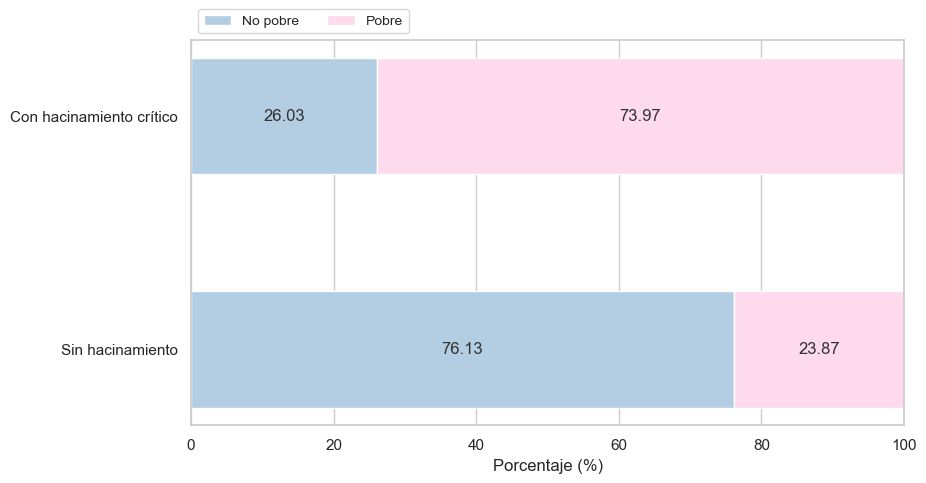

In [24]:
import numpy as np
import matplotlib.pyplot as plt
category_names = ['No pobre', 'Pobre']

results = {
    'Con hacinamiento crítico': [percent_no_pobre_con_hacin, percent_pobre_con_hacin], 
    'Sin hacinamiento': [percent_no_pobre_sin_hacin, percent_pobre_sin_hacin]
}

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['Pastel1'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else '0.2'

        ax.bar_label(rects, label_type='center', color=text_color)
    
    # Asegurarse de que el eje X sea visible
    ax.xaxis.set_visible(True)
    
    # Agregar el título al eje X
    ax.set_xlabel("Porcentaje (%)", fontsize=12)

    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()


In [25]:
# Filtrar los datos para contar solo los casos con subsidio a la salud
con_subsidio = train_pobreza[train_pobreza["salud_subsi"] == 1]

# Contar la cantidad de pobres y no pobres con subsidio a la salud
count_pobre_no_pobre_subsidio = con_subsidio.groupby("Pobre")["salud_subsi"].count()

# Calcular el total de hogares con subsidio a la salud
total_con_subsidio = count_pobre_no_pobre_subsidio.sum()

# Calcular los porcentajes de pobres y no pobres con subsidio a la salud
percent_pobre_con_subsidio = ((count_pobre_no_pobre_subsidio[1] / total_con_subsidio) * 100).round(2)  # Pobre = 1
percent_no_pobre_con_subsidio = ((count_pobre_no_pobre_subsidio[0] / total_con_subsidio) * 100).round(2)  # No pobre = 0

# Filtrar los datos para contar solo los casos sin subsidio a la salud
sin_subsidio = train_pobreza[train_pobreza["salud_subsi"] == 0]

# Contar la cantidad de pobres y no pobres sin subsidio a la salud
count_pobre_no_pobre_sin_subsidio = sin_subsidio.groupby("Pobre")["salud_subsi"].count()

# Calcular el total de hogares sin subsidio a la salud
total_sin_subsidio = count_pobre_no_pobre_sin_subsidio.sum()

# Calcular los porcentajes de pobres y no pobres sin subsidio a la salud
percent_pobre_sin_subsidio = ((count_pobre_no_pobre_sin_subsidio[1] / total_sin_subsidio) * 100).round(2)  # Pobre = 1
percent_no_pobre_sin_subsidio = ((count_pobre_no_pobre_sin_subsidio[0] / total_sin_subsidio) * 100).round(2)  # No pobre = 0

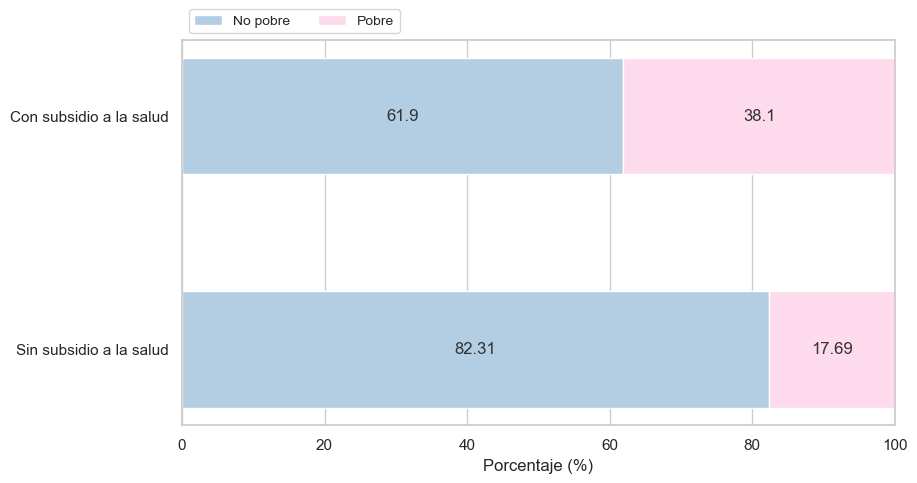

In [26]:
category_names = ['No pobre', 'Pobre']

results = {
    'Con subsidio a la salud': [percent_no_pobre_con_subsidio, percent_pobre_con_subsidio], 
    'Sin subsidio a la salud': [percent_no_pobre_sin_subsidio, percent_pobre_sin_subsidio]
}

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['Pastel1'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else '0.2'

        ax.bar_label(rects, label_type='center', color=text_color)
    
    # Asegurarse de que el eje X sea visible
    ax.xaxis.set_visible(True)
    
    # Agregar el título al eje X
    ax.set_xlabel("Porcentaje (%)", fontsize=12)

    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

survey(results, category_names)
plt.show()

C:\Users\Sofia\AppData\Local\Temp\ipykernel_21532\2868484159.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=train_pobreza, x="Pobre_label", y="P6040", palette="pastel", split=True)


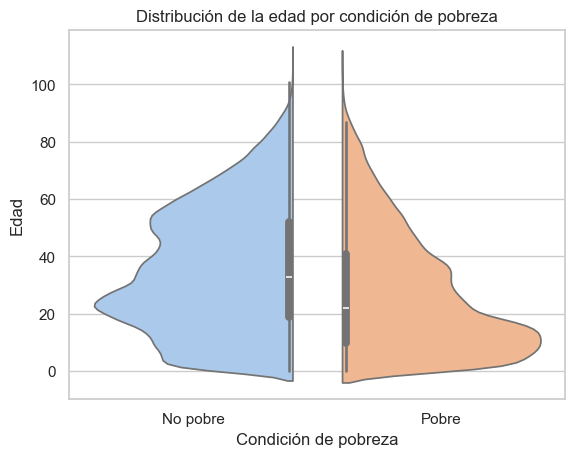

In [27]:
sns.violinplot(data=train_pobreza, x="Pobre_label", y="P6040", palette="pastel", split=True)
plt.xlabel("Condición de pobreza")
plt.ylabel("Edad")
plt.title("Distribución de la edad por condición de pobreza")
plt.xticks([0, 1], ["No pobre", "Pobre"])
plt.show()
